# DPWorld Python Coding Test

**Author:** Nicholas Miller

**Date:** 19 July 2021

**Instructions:**

Python Code Testing

The purpose of the test is to evaluate your python coding ability. 

1. Take data from https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv
2. Using paython to read the whole data into pandas dataframe.
3. Perform some simple analysis to the data to remove some columns and to keep some columns that you think are important.
   What columns to keep is quite subjective but I hope you can based on your data analysis knowledge to make reasonable choices.
   Minimum number of columns should be 5.
4. Write code to calculate common statistics that you think are impotant based on the trimmed dataset.
5. Visualize data analysis results and pick some of them that you think are meaningful to add comment about what we can learn 
   from the analysis result.
   
It is preferred that you can use jupyter notebook to code so that the code/charts/explanations can show nicely in one file.

If this is not feasible to you, provide a .py file with comments also fine.

Again, this is mainly a code testing, it is not necessary to do exhausted data analysis. Choose some major analysis steps should be enough.

But we do want to see your ability to use python to manipulate the data, for example, max, min, moving average, price breakdown by ..., you name it.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv',
                 parse_dates=['date'], index_col='id')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Identify Columns to Remove

Since the purpose is to analyze the data and remove columns that I don't consider important, I'm going to go about this differently than I would if I were building a model that is for prediction.

In [2]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Immediately I can see some unusual data, for example, apparently some homes have `33` bedrooms, some homes have "half" floors, and N/A data appears to be filled with zeros.

I can also start to identify some columns that probably provide less useful information due to their sparsity.  For example, I would already consider dropping `waterfront`, `view`, `sqft_basement`, and `yr_renovated`.

In [3]:
df[['waterfront','view','sqft_basement','yr_renovated']].replace(0,np.nan).notna().sum()/len(df)

waterfront       0.007542
view             0.098274
sqft_basement    0.392680
yr_renovated     0.042289
dtype: float64

- `waterfront` has less than 1% of the data filled so this can be dropped.  However, I imagine this could be useful for identifying higher priced homes and perhaps useful in the relation to location.  I'll drop it anyway.
- `view` has almost 10% but I will still drop this.
- `yr_renovated` has 4% so I will drop this too.  This probably helps correlate older homes with higher prices.
- `sqft_basement` has 39% of the data.  This one is tricky.

I'll be removing the first 3.  I'll now check this last one in more detail.

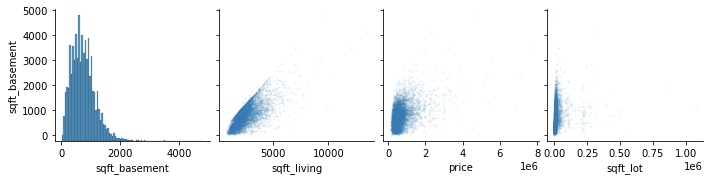

In [4]:
# df.drop(columns=['waterfront','view','yr_renovated'], inplace=True)

basement_df = df[df['sqft_basement']>0].copy()

sns.pairplot(basement_df, x_vars=['sqft_basement', 'sqft_living', 'price', 'sqft_lot'], y_vars=['sqft_basement'],
             plot_kws={'alpha': 0.1, 's': 3}
            )
plt.show()

Looks like I'll keep this because it could be causal.  If I were to use this in a prediction model, I might add a column for `has_basement` and set these to `0` if the `sqft_basement` is also `0` otherwise `1`.

I next want to look at what might be some redundant columns: `sqft_living` : `sqft_living15` and `sqft_lot` : `sqft_lot15`

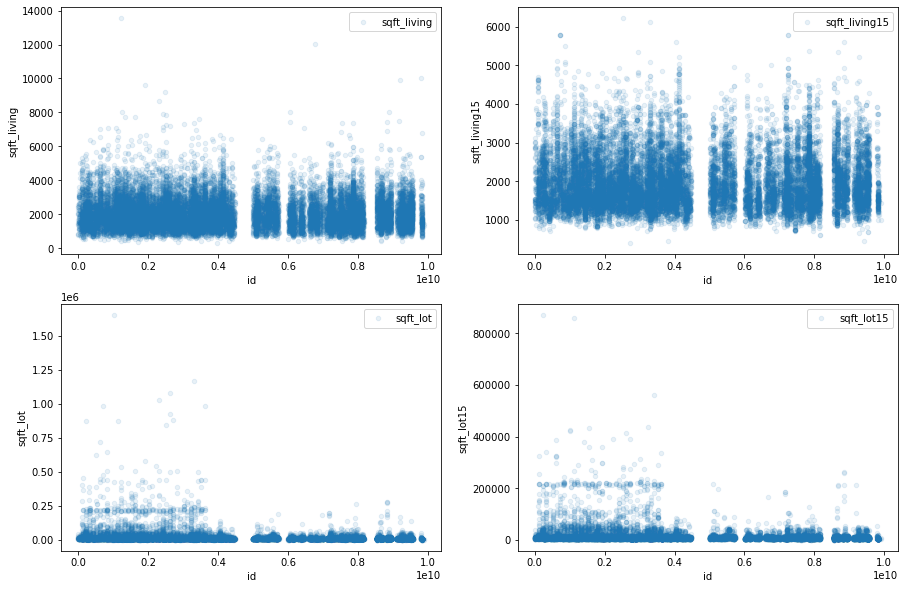

In [5]:
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(221)
df.reset_index().plot.scatter(x='id', y='sqft_living', alpha=0.1, ax=ax1, label='sqft_living')

ax2= plt.subplot(222)
df.reset_index().plot.scatter(x='id', y='sqft_living15', alpha=0.1, ax=ax2, label='sqft_living15')

ax3 = plt.subplot(223)
df.reset_index().plot.scatter(x='id', y='sqft_lot', alpha=0.1, ax=ax3, label='sqft_lot')

ax4= plt.subplot(224)
df.reset_index().plot.scatter(x='id', y='sqft_lot15', alpha=0.1, ax=ax4, label='sqft_lot15')

plt.show()

It looks like the "15" variants might be a scaled version of their namesakes.  I searched online and found the [original dataset description](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/) and the truth is slightly different:

 - `sqft_living15` - Average size of interior housing living space for the closest 15 houses, in square feet
 - `sqft_lot15` - Average size of land lots for the closest 15 houses, in square feet
 
These columns might be useful in a prediction model but maybe less so for analysis.  Because of this I'll be removing them.

In [6]:
df.drop(columns=['waterfront','view','yr_renovated','sqft_living15','sqft_lot15'], inplace=True)

print(f'Remaining columns:\n{df.columns}')

Remaining columns:
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long'],
      dtype='object')


## House Sales

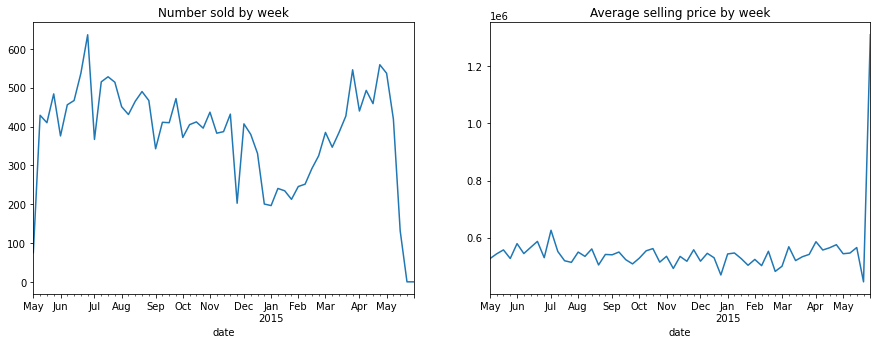

In [7]:
sold_df = df.groupby(pd.Grouper(key='date', freq='1w'))['price'].agg(['count','mean'])
fig,ax = plt.subplots(1,2,figsize=(15,5))

sold_df['count'].plot(ax=ax[0], title='Number sold by week')
sold_df['mean'].plot(ax=ax[1], title='Average selling price by week')

plt.show()

## Year Built

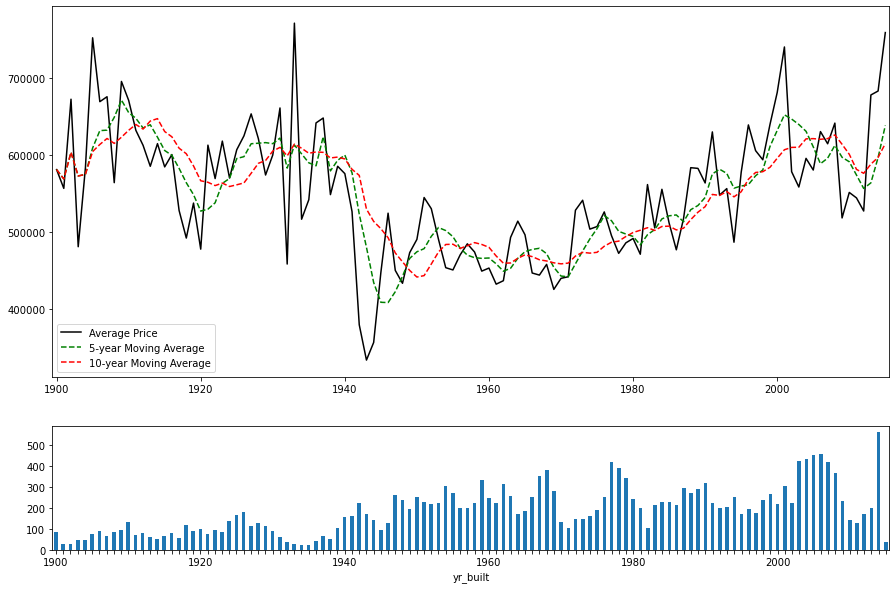

In [8]:
from matplotlib import gridspec

year_df = df.groupby('yr_built')['price'].agg(['mean','std','count'])
year_df['std_high'] = year_df['mean']+year_df['std']
year_df['std_low'] = year_df['mean']-year_df['std']
year_df['ma5'] = year_df.rolling(5, min_periods=1)['mean'].mean()
year_df['ma10'] = year_df.rolling(10, min_periods=1)['mean'].mean()


fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

ax1=plt.subplot(gs[0])
# ax1.fill_between(year_df.index, year_df.std_high, year_df.std_low, alpha=0.2, label='Standard Deviation')
ax1.plot(year_df.index, year_df['mean'], label='Average Price', color='k')
ax1.plot(year_df.index, year_df['ma5'], label='5-year Moving Average', color='g', linestyle='--')
ax1.plot(year_df.index, year_df['ma10'], label='10-year Moving Average', color='r', linestyle='--')
ax1.margins(0.005,None)
ax1.legend()

ax2=plt.subplot(gs[1])
year_df['count'].plot.bar(ax=ax2)
ax2.set_xticklabels([t if not i%20 else "" for i,t in enumerate(ax2.get_xticklabels())], rotation=0)

plt.show()

The price has a lot of variance so I removed the standard deviation from the graph to make it easier to read.  For homes built from 1960 onwards, there is upward trend with a noticable drop for homes built around the 2008's housing crisis.

## House Layouts

In [9]:
def get_index_string(df,row=None,idx=None):
    if row is not None:
        return (', '.join([f'{i}={v}' for i,v in zip(df.index.names, df.iloc[row].name)]))
    else:
        return (', '.join([f'{i}={v}' for i,v in zip(df.index.names, df.loc[idx].name)]))

df['age'] = (df.yr_built.max()-df.yr_built)  # Age of home

room_df = df.groupby(['floors', 'bedrooms','bathrooms'])[['price','age']] \
            .agg(['mean','std','count']) \
            .sort_values(by=('age','count'), ascending=False)
room_df.columns = ['_'.join(col).strip() for col in room_df.columns.values]

print(f'Variations of floors/bedrooms/bathrooms: {len(room_df)}')
print(f'Variations which represent only one home: {len(room_df[room_df.age_count == 1])}')
print(f'Variations which represent 90% of homes sold: {len(room_df[room_df.age_count.cumsum()<=room_df.age_count.sum()*0.9])}')
print(f'Most popular variation ({get_index_string(room_df, 0)}) represents ' +
      f'{round((room_df.iloc[0].age_count / room_df.age_count.sum())*100,2)}% of homes sold')

youngest=room_df.age_mean.idxmin()
print(f'Youngest ({get_index_string(room_df, idx=youngest)}) averaged {room_df.loc[youngest].age_mean} ' +
      f'years old and {int(room_df.loc[youngest].age_count)} homes sold')

oldest=room_df.age_mean.idxmax()
print(f'Oldest ({get_index_string(room_df, idx=oldest)}) averaged {room_df.loc[oldest].age_mean} ' +
      f'years old and {int(room_df.loc[oldest].age_count)} homes sold')

room_df.head()

Variations of floors/bedrooms/bathrooms: 389
Variations which represent only one home: 101
Variations which represent 90% of homes sold: 70
Most popular variation (floors=2.0, bedrooms=4, bathrooms=2.5) represents 9.11% of homes sold
Youngest (floors=3.0, bedrooms=2, bathrooms=3.0) averaged 0.5 years old and 2 homes sold
Oldest (floors=1.0, bedrooms=7, bathrooms=2.5) averaged 114.0 years old and 1 homes sold


price_mean      price_std  price_count  \
floors bedrooms bathrooms                                              
2.0    4        2.50       567751.307107  249541.179402         1970   
       3        2.50       493535.596895  213850.517854         1739   
1.0    3        1.75       420871.842205  176395.191354         1578   
                1.00       316372.358763  136146.751778         1455   
       2        1.00       341050.637980  141848.383552         1406   

                            age_mean    age_std  age_count  
floors bedrooms bathrooms                                   
2.0    4        2.50       17.537563  14.174307       1970  
       3        2.50       17.842438  13.579515       1739  
1.0    3        1.75       50.200887  18.539942       1578  
                1.00       59.792440  15.328393       1455  
       2        1.00       75.502134  17.881729       1406

There looks to be some relationship between the age a home and the number of floors.  I'll build some histograms to see if this holds water.

87.54% of homes sold are either 1 or 2 story


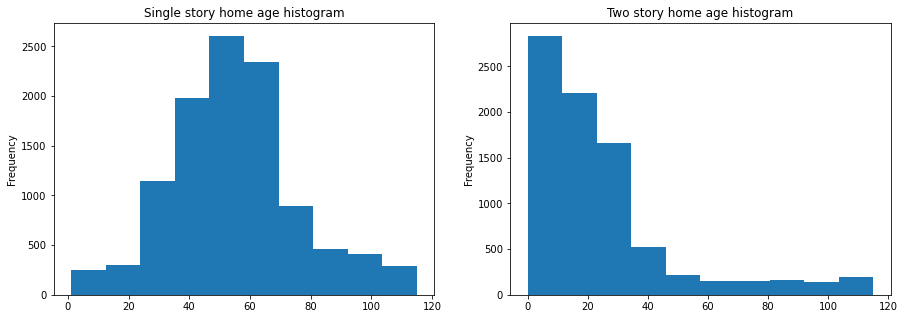

In [10]:
print(f'{round(len(df[df.floors.isin([1,2])])/len(df)*100,2)}% of homes sold are either 1 or 2 story')

fig, ax = plt.subplots(1,2,figsize=(15,5))
df[df.floors==1].age.plot(kind='hist', ax=ax[0], title='Single story home age histogram')
df[df.floors==2].age.plot(kind='hist', ax=ax[1], title='Two story home age histogram')
plt.show()

I'll now look to see how bedrooms and bathrooms impact the price and number of units sold.

<ipython-input-11-dc8bc73b30ac>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=ax[0].get_xticklabels())
<ipython-input-11-dc8bc73b30ac>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90)


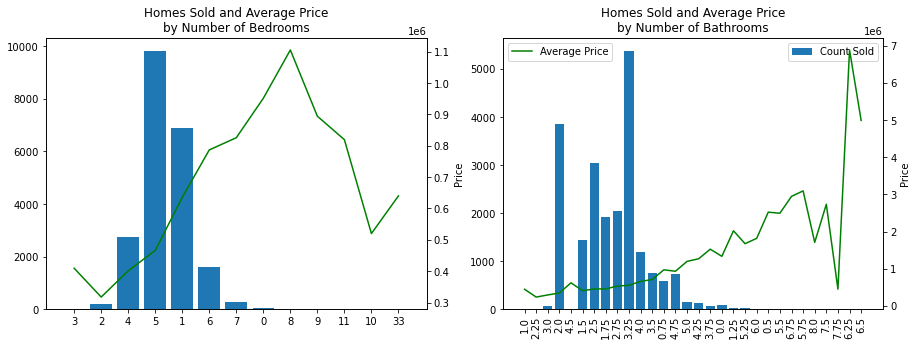

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

label_format = '.0f'

bath_df = df.groupby('bedrooms')['price']
x=[str(v) for v in df.bedrooms.unique()]
ax1=ax[0]
ax1.bar(x, bath_df.count().values, label='Count Sold')
ax1.set_xticklabels(labels=ax[0].get_xticklabels())
ax1.set_title('Homes Sold and Average Price\nby Number of Bedrooms')

ax2=ax[0].twinx()
ax2.plot(x, bath_df.mean().values, label='Average Price', color='g')
ax2.set_ylabel('Price')

bath_df = df.groupby('bathrooms')['price']
x=[str(v) for v in df.bathrooms.unique()]
ax3=ax[1]
ax3.bar(x, bath_df.count().values, label='Count Sold')
ax3.set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90)
ax3.set_title('Homes Sold and Average Price\nby Number of Bathrooms')

ax4=ax[1].twinx()
ax4.plot(x, bath_df.mean().values, label='Average Price', color='g')
ax4.set_ylabel('Price')
ax[1].legend()
ax4.legend()

plt.show()

The data is much smoother for when there is enough records.  The average price starts to jump around a lot where there is less data.  This is a good way to identify outliers and possibly exclude them from analysis.  I won't be removing any records here.

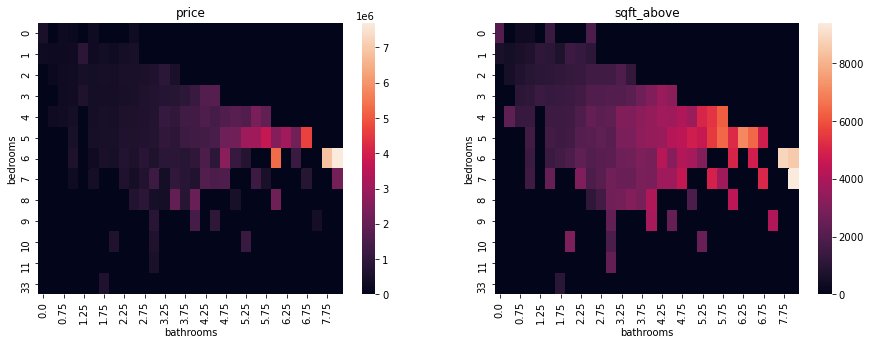

In [12]:
heatmap1_df = pd.pivot_table(df, values='price', columns='bathrooms', index='bedrooms', aggfunc=np.mean, fill_value=0)
heatmap2_df = pd.pivot_table(df, values='sqft_above', columns='bathrooms', index='bedrooms', aggfunc=np.mean, fill_value=0)
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(121)
ax1.set_title('price')
sns.heatmap(heatmap1_df,ax=ax1)

ax2 = plt.subplot(122)
ax2.set_title('sqft_above')
sns.heatmap(heatmap2_df,ax=ax2)

plt.show()

Another view using a heatmap more clearly showing relationships between the number of `bedrooms` and `bathrooms` and how that impacts `price` and `sqft_above`.

## Grade and Condition
Since I also have `grade` and `condition` columns, this time I'm going to use a SPLOM (scatter plot matrix a.k.a. pair plot).

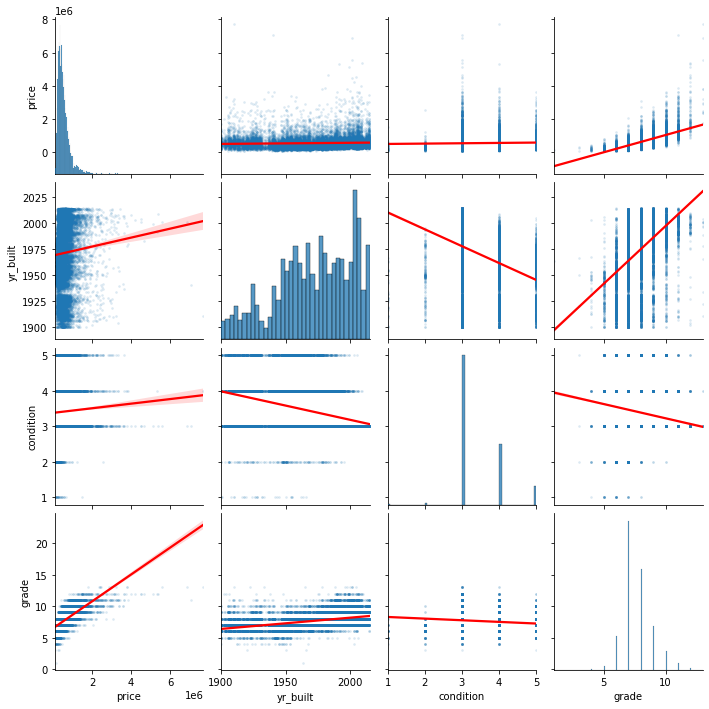

In [13]:
splom_cols = ['price', 'yr_built', 'condition', 'grade']
sns.pairplot(df[splom_cols], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's': 3}})
plt.show()

I added regression lines to help pick out the correlations and I can see that `(grade, price)` and `(grade, yr_built)` are highly correlated. `(condition, price)` and `(yr_built, price)` don't appear to be as correlated but  `(condition, yr_built)` is inversely correlated suggesting that a `condition = 1` could be better than a `condition = 5` but its difficult to tell from here.

## Location

I'm curious to see how `lat` and `long` play a role so I'll make a heatmap.  To do this, I'll need to bin these values separately and then get the average housing price for each `lat`/`long` bin combination.

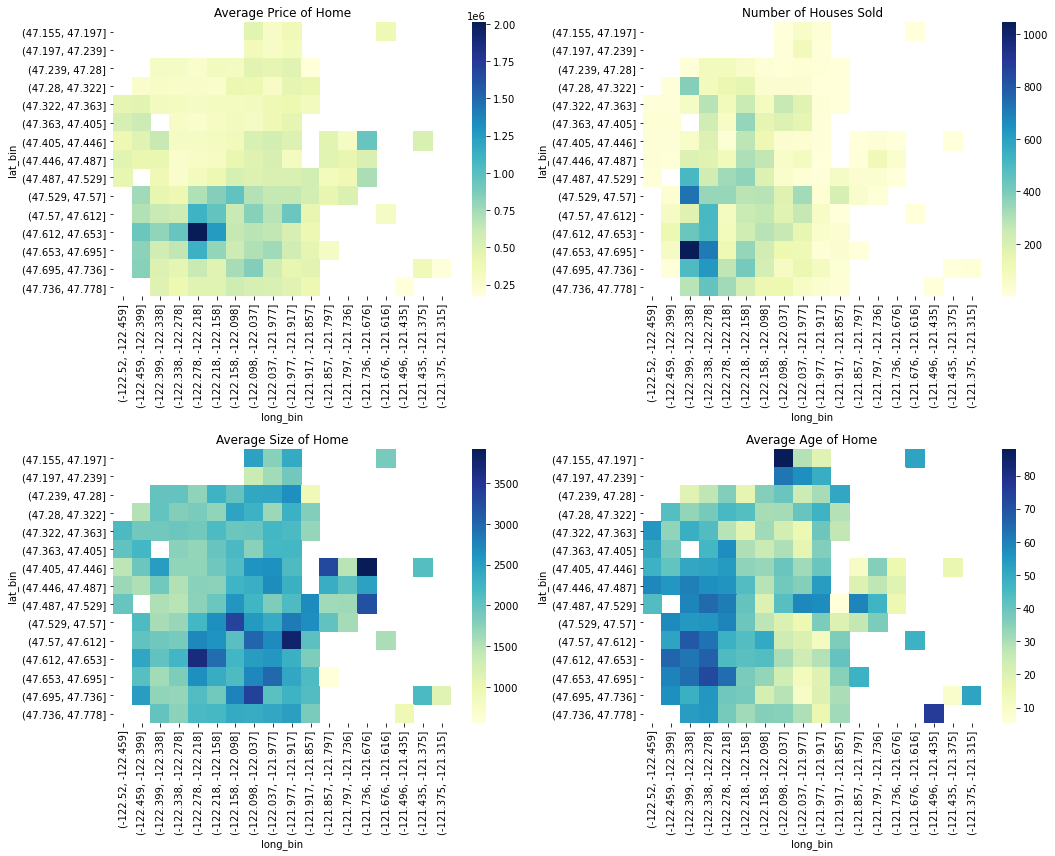

In [14]:
df['lat_bin'] = pd.cut(df.lat, 15)
df['long_bin'] = pd.cut(df.long, 20)
fig,ax = plt.subplots(2,2,figsize=(15,12))

ax[0][0].set_title('Average Price of Home')
sns.heatmap(pd.pivot_table(df, values='price', columns='long_bin', index='lat_bin', aggfunc=np.mean),
            cmap="YlGnBu", ax=ax[0][0])

ax[0][1].set_title('Number of Houses Sold')
sns.heatmap(pd.pivot_table(df, values='price', columns='long_bin', index='lat_bin', aggfunc=lambda x: len(x)),
            cmap="YlGnBu", ax=ax[0][1])

ax[1][0].set_title('Average Size of Home')
sns.heatmap(pd.pivot_table(df, values='sqft_living', columns='long_bin', index='lat_bin', aggfunc=np.mean),
            cmap="YlGnBu", ax=ax[1][0])

ax[1][1].set_title('Average Age of Home')
sns.heatmap(pd.pivot_table(df, values='age', columns='long_bin', index='lat_bin', aggfunc=np.mean),
            cmap="YlGnBu", ax=ax[1][1])

fig.tight_layout()
plt.show()

From these heatmaps, more affluent areas standout against less affluent areas.  Areas of development can also be identified by their younger on average homes.  Urban areas might be identifiable by high concentrations of home sales.

On that vein, I want to see how zipcode plays a role using box plots.  I'll sort them by their average price instead of the actual zipcode to make the graph a bit cleaner.

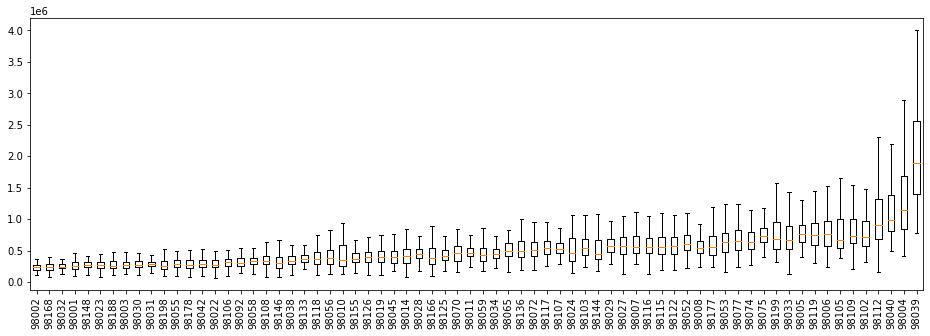

In [15]:
fig = plt.figure(figsize=(16,5))
data=[]
sorted_zipcodes = list(df.groupby('zipcode').mean()['price'].sort_values().index)

for zipcode in sorted_zipcodes:
    data.append(df[df.zipcode==zipcode].price)
plt.boxplot(data, showfliers=False)
plt.xticks(range(1,len(data)+1), sorted_zipcodes, rotation=90)
plt.show()

There is some useful information in zipcode but mostly on the upper-end where the most upper-class areas standout in stark contrast to the other areas.

## House Sizes

I'll now look for correlations in some of the other data using again a SPLOM.  A lot of the fields contain outlier which makes the data harder to read.  To visualize this a bit better, I'm going to clean this up a bit by removing some outliers and seeing how that looks.  I'll do this by only looking at the first 2 standard deviations (95% data closest to the mean).

Since one and two story homes represent `87.54%` of the homes sold, I'm going to separate the data based on these two values.

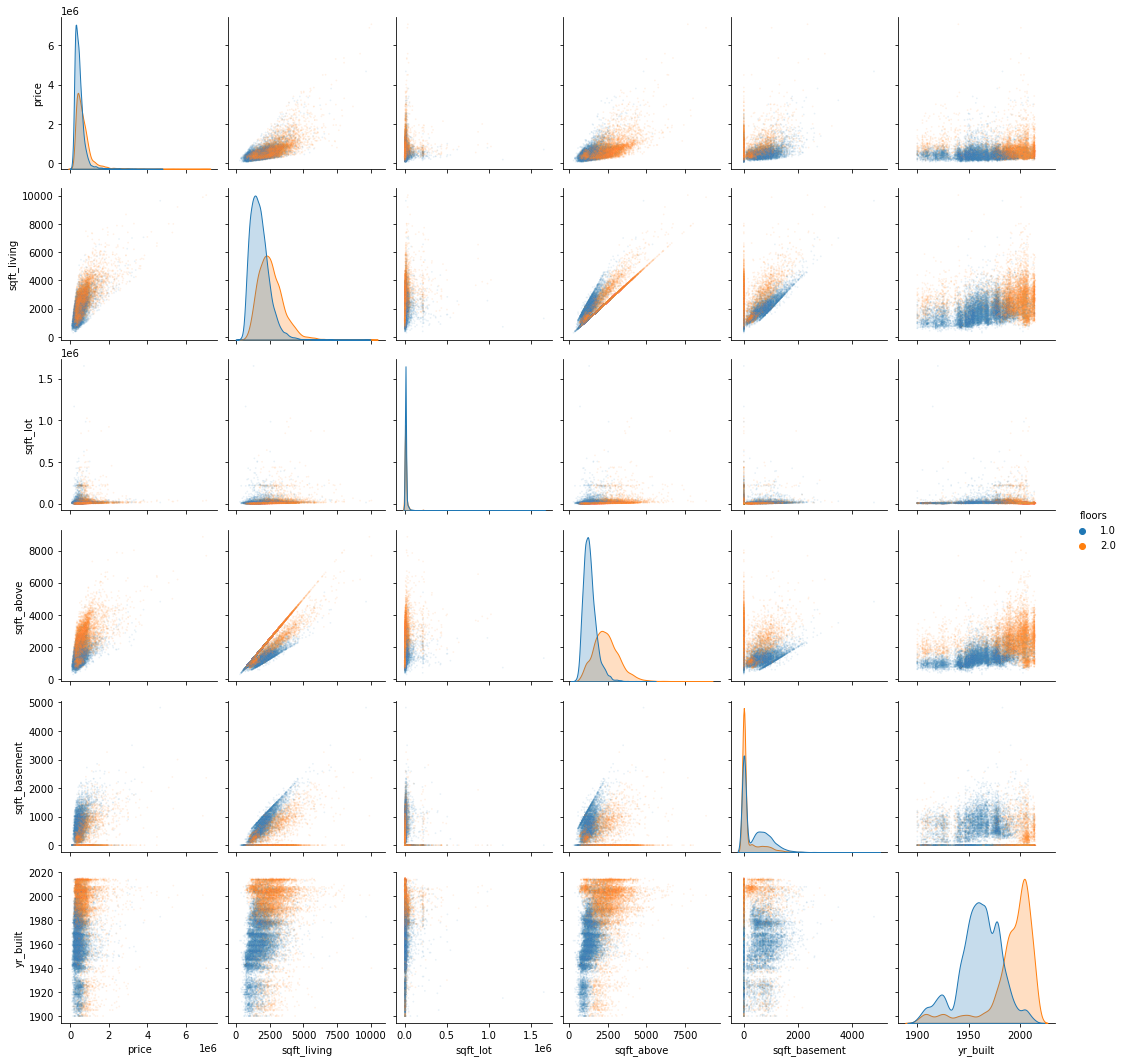

In [16]:
splom_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'floors']
splom_df = df[df.floors.isin([1,2])][splom_cols].copy()

indexes_to_drop = set()

for col in ['sqft_living','sqft_lot','sqft_lot','sqft_above','sqft_basement']:
    data_mean, data_std = df[col].mean(), df[col].std()
    lower, upper = data_mean-data_std*2, data_mean+data_std*2
    indexes_to_drop.union(set(df[(df[col]>upper) | (df[col]<lower)].index))
    
splom_df.drop(indexes_to_drop, inplace=True)

sns.pairplot(splom_df, hue='floors', palette='tab10', plot_kws={'alpha': 0.1, 's': 3})
plt.show()

The number of floors does correlate with the `yr_built` and `sqft` suggesting that homes are becomes larger.  `sqft_basement` also has some interesting characteristics.  I want to see if I'm right about the average house size by using the `sqft_living` as a proxy for house size.

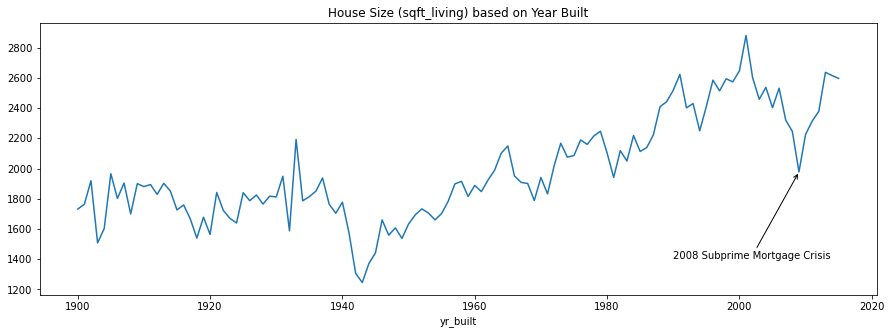

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby('yr_built').sqft_living.mean().plot(ax=ax, title='House Size (sqft_living) based on Year Built')

ax.annotate('2008 Subprime Mortgage Crisis',
            xy=(2009,1977.517391), xycoords='data',
            xytext=(1990,1400), textcoords='data',
            arrowprops=dict(arrowstyle='->')
           )
plt.show()

## Conclusion

Since this is EDA (Exploratory Data Analysis), I investigated several different avenues within the dataset.  I can see that a lot of interesting stories can be told and the visuals I would pick would depend on the story I wanted to tell or my customer was interested in learning about.  I've broken this notebook into different sections to touch on some of the stories that could be explored further.  I found the last section, the House Sizes section, to be a particularly telling story.

## Watermark

In [18]:
%load_ext watermark

In [19]:
%watermark --iversions

seaborn   : 0.11.0
numpy     : 1.19.2
pandas    : 1.2.1
matplotlib: 3.3.2



In [20]:
%watermark --python

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

